In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM,Dense
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

In [3]:
# from ohlc import df
df = pd.read_csv('df_ohlc.csv',usecols=[1,2,3,4,5])
data = df[:40]
# data = df
# print(tabulate(df.head(), headers=df.columns, tablefmt="fancy_grid"))

# data = df[['close','high','low','open','volume']]
# data = data.values
print(data.shape)
# data = np.reshape(data,(500,1))
print(data.shape)
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data = data.astype('float32')
print(tabulate(data, headers=df.columns, tablefmt="fancy_grid"))
print(data.shape)
# data = data[:-1,1]
# data = data.reset_index(name="new")
# print(len(data))
# train,test = data[0:int(0.6*len(data)),],data[int(0.6*len(data)):,]
train = data[0:int(0.6*len(data)),]

(40, 5)
(40, 5)
╒═══════════╤═══════════╤══════════╤════════════════════╤═══════════╕
│     close │      high │      low │   number_of_trades │      open │
╞═══════════╪═══════════╪══════════╪════════════════════╪═══════════╡
│ 0.885828  │ 0.860958  │ 0.871388 │          0.161408  │ 0.835027  │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│ 0.739046  │ 0.855551  │ 0.847766 │          0.130844  │ 0.885148  │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│ 0.82936   │ 0.825469  │ 0.840311 │          0.126136  │ 0.742549  │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│ 0.92368   │ 0.935974  │ 0.92533  │          0.0498926 │ 0.833289  │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│ 0.952884  │ 0.916133  │ 0.916375 │          0.155791  │ 0.928036  │
├───────────┼───────────┼──────────┼────────────────────┼───────────┤
│ 1         │ 1         │ 1        │          0.130183  │ 0.953176  │
├───

In [4]:
step = 5
def maketime(t,data):
    x=[]
    y=[]
    z=0
    for i in range(len(data)-t):
        a = data[i:i+t]
        x.append(a)
        b = data[i+t]
        y.append(b)

    return np.array(x), np.array(y)

x_train,y_train= maketime(step,train)
# x_test,y_test= maketime(step,test)


#this shape --->> [sample, time-step ,feature]
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],5))
# x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],5))

In [5]:
#############  Model    ###################################


model = Sequential()
model.add(LSTM(5,input_shape=(step,5)))
model.add(Dense(5))

model.compile(optimizer='adam' ,loss='mean_squared_error')
model.fit(x_train,y_train,epochs=2,batch_size=1,verbose=2)

# n_steps=5
# n_features=5
# print(train[-5:])
# x_input = train[-5:]
# x_input = x_input.reshape((1, n_steps, n_features))
# print(x_input.shape)

Epoch 1/2
19/19 - 0s - loss: 0.2868
Epoch 2/2
19/19 - 0s - loss: 0.2227


In [6]:
##################   prediction ###########################
n_steps=5
n_features=5
# demonstrate prediction for next 10 days
# x_input = np.array([187, 196, 210])
# temp_input=list(x_input)
x_input = data[-15:-10]
print(x_input,"kkkkkkkkkkkkkkkk")
test = data[-10:]
temp_input=list(x_input )
lst_output=[]
i=0



while(i<10):
    
    if(len(temp_input)>5):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        # temp_input.append(yhat[0][0])
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]

        lst_output.append(yhat[0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0])
        lst_output.append(yhat[0])
        i=i+1
    

[[0.85581183 0.8057824  0.813037   0.12027094 0.723614  ]
 [0.7386402  0.8057824  0.7448217  0.19114488 0.8598479 ]
 [0.5602534  0.6733613  0.68378866 0.1192797  0.7556513 ]
 [0.60034585 0.58082104 0.6170432  0.09334215 0.5582682 ]
 [0.5068027  0.52134186 0.5328727  0.09953742 0.6031949 ]] kkkkkkkkkkkkkkkk
[0.11777955 0.08521137 0.34503087 0.33953965 0.18959124]
1 day input [[0.7386402  0.8057824  0.7448217  0.19114488 0.8598479 ]
 [0.5602534  0.6733613  0.68378866 0.1192797  0.7556513 ]
 [0.60034585 0.58082104 0.6170432  0.09334215 0.5582682 ]
 [0.5068027  0.52134186 0.5328727  0.09953742 0.6031949 ]
 [0.11777955 0.08521137 0.34503087 0.33953965 0.18959124]]
1 day output [[0.10304169 0.04374118 0.2454871  0.23405309 0.11498642]]
2 day input [[0.5602534  0.6733613  0.68378866 0.1192797  0.7556513 ]
 [0.60034585 0.58082104 0.6170432  0.09334215 0.5582682 ]
 [0.5068027  0.52134186 0.5328727  0.09953742 0.6031949 ]
 [0.11777955 0.08521137 0.34503087 0.33953965 0.18959124]
 [0.10304169 0.0

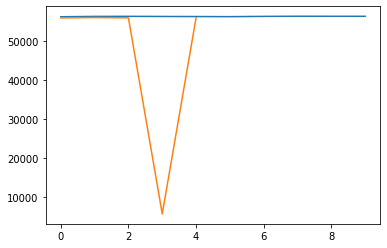

In [7]:
# print(lst_output)
out_put=pd.DataFrame(lst_output)
# print(pd.DataFrame(lst_output))
# print(out_put[0])

test_inverse = scaler.inverse_transform(test)
out_put_inverse = scaler.inverse_transform(out_put)

# print(out_put[0].shape, test[0].shape)
# print(out_put,test)
# print("****************",out_put[0],"*********", test[:,0],"******************")
plt.plot(test_inverse[:,0])
plt.plot(out_put_inverse[0])
# plt.plot(testPredictPlot[:,0])
plt.show()